The IMDB dataset is a set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for validation, each set consisting of 50% negative and 50% positive reviews.

It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

The problem statement is to get a reasonably good prediction of the review for a the validation data based on the Machine learning from the training data

In this notebook the attempts of using different neural network architecture are presented:

1) Recurrent Neural network

2) Long Short-term memory (to capture long-term memory dependencies)

3) Bi-directional Recurrent Neural Network and Bi-directional Long Short-term memory

In [ ]:
import keras

from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding, SimpleRNN

In [ ]:
#RNN illustration of model summary and return_sequence = True

In [ ]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32))
model.summary()

#The embedding matrix if its weights have to be initialized
#The embedding matrix is of sha (no of words it's encoding for, dimension of each word)



#input to the embedding layer is (samples, maxlen(of the no of words))
#embedding has dimensions, 10000 (no of words it is emebedding for) , dimension of each word, input_shape = maxlen(optional)
#embedding gives out the output of (,maxlen, dimension)
#RNN takes as input (num_batches, timesteps, input_features)
#RNN gives out output(num_batches, output_value) if the return_sequence is not explicitly mentioned to be True

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()
#RNN gives out output(num_batches, timesteps, output_value) if the return_sequence is  explicitly mentioned to be True

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True ))
model.add(SimpleRNN(32,return_sequences=True ))
model.add(SimpleRNN(32,return_sequences=True ))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


In [ ]:

from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
     num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

Loading data...
17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


25000 train sequences
25000 test sequences


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

Pad sequences (samples x time)


In [ ]:
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
# MODEL - 1 : Running an RNN network

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 23s 142ms/step - loss: 0.6743 - acc: 0.5657 - val_loss: 0.4696 - val_acc: 0.7998
Epoch 2/10
157/157 [==============================] - 21s 134ms/step - loss: 0.4158 - acc: 0.8276 - val_loss: 0.3724 - val_acc: 0.8386
Epoch 3/10
157/157 [==============================] - 21s 133ms/step - loss: 0.2885 - acc: 0.8865 - val_loss: 0.3921 - val_acc: 0.8546
Epoch 4/10
157/157 [==============================] - 21s 133ms/step - loss: 0.2642 - acc: 0.8969 - val_loss: 0.5264 - val_acc: 0.8002
Epoch 5/10
157/157 [==============================] - 21s 133ms/step - loss: 0.2354 - acc: 0.9110 - val_loss: 0.4851 - val_acc: 0.8358
Epoch 6/10
157/157 [==============================] - 21s 134ms/step - loss: 0.1875 - acc: 0.9303 - val_loss: 0.3498 - val_acc: 0.8660
Epoch 7/10
157/157 [==============================] - 22s 137ms/step - loss: 0.1631 - acc: 0.9409 - val_loss: 0.4074 - val_acc: 0.8344
Epoch 8/10
157/157 [==============================] - 2

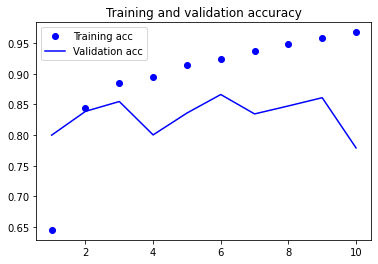

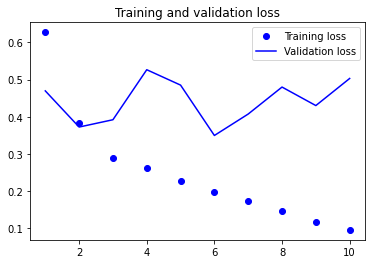

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#MODEL - 2: RUNNING LSTM

from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 55s 337ms/step - loss: 0.6340 - acc: 0.6421 - val_loss: 0.7179 - val_acc: 0.7222
Epoch 2/10
157/157 [==============================] - 51s 323ms/step - loss: 0.3312 - acc: 0.8693 - val_loss: 0.3104 - val_acc: 0.8770
Epoch 3/10
157/157 [==============================] - 55s 353ms/step - loss: 0.2397 - acc: 0.9106 - val_loss: 0.2827 - val_acc: 0.8862
Epoch 4/10
157/157 [==============================] - 55s 352ms/step - loss: 0.1916 - acc: 0.9313 - val_loss: 0.4958 - val_acc: 0.8316
Epoch 5/10
157/157 [==============================] - 56s 355ms/step - loss: 0.1730 - acc: 0.9392 - val_loss: 0.2970 - val_acc: 0.8768
Epoch 6/10
157/157 [==============================] - 55s 352ms/step - loss: 0.1498 - acc: 0.9473 - val_loss: 0.3504 - val_acc: 0.8568
Epoch 7/10
157/157 [==============================] - 55s 353ms/step - loss: 0.1330 - acc: 0.9548 - val_loss: 0.3436 - val_acc: 0.8862
Epoch 8/10
157/157 [==============================] - 5

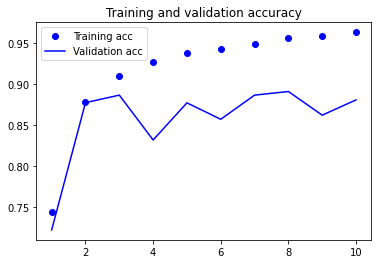

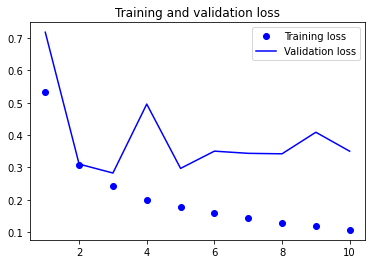

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#MODEL - 3 LSTM with reversed data
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print('input_train shape:', x_train.shape)
print('input_test shape:', x_test.shape)

Loading data...


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
from keras import layers

In [ ]:
model = Sequential()
model.add(layers.Embedding(max_features, 128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
epochs=10, batch_size=128, validation_split=0.2)



Epoch 1/10
157/157 [==============================] - 72s 448ms/step - loss: 0.5894 - acc: 0.6727 - val_loss: 0.3956 - val_acc: 0.8338
Epoch 2/10
157/157 [==============================] - 74s 474ms/step - loss: 0.3134 - acc: 0.8784 - val_loss: 0.3428 - val_acc: 0.8618
Epoch 3/10
157/157 [==============================] - 74s 469ms/step - loss: 0.2529 - acc: 0.9094 - val_loss: 0.3834 - val_acc: 0.8322
Epoch 4/10
157/157 [==============================] - 74s 471ms/step - loss: 0.2113 - acc: 0.9244 - val_loss: 0.5179 - val_acc: 0.8272
Epoch 5/10
157/157 [==============================] - 74s 469ms/step - loss: 0.1967 - acc: 0.9309 - val_loss: 0.4861 - val_acc: 0.8500
Epoch 6/10
157/157 [==============================] - 74s 469ms/step - loss: 0.1630 - acc: 0.9435 - val_loss: 0.3759 - val_acc: 0.8640
Epoch 7/10
157/157 [==============================] - 74s 470ms/step - loss: 0.1345 - acc: 0.9533 - val_loss: 0.3798 - val_acc: 0.8656
Epoch 8/10
157/157 [==============================] - 7

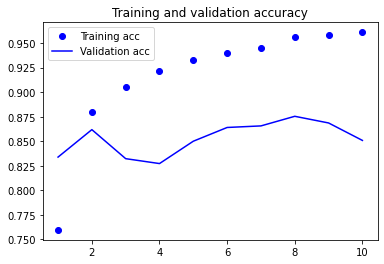

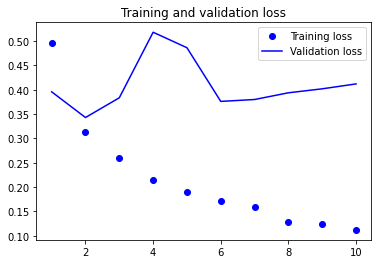

In [ ]:
#to revise plot after re-running above block
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#MODEL 4: BI-DIRECTIONAL NETWORK:
#also just create and check how the LSTM network and Bidirectional lstm differ in the number of parameters
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train,
epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 97s 601ms/step - loss: 0.6400 - acc: 0.6226 - val_loss: 0.4889 - val_acc: 0.7986
Epoch 2/10
157/157 [==============================] - 93s 591ms/step - loss: 0.4079 - acc: 0.8368 - val_loss: 0.3510 - val_acc: 0.8644
Epoch 3/10
157/157 [==============================] - 93s 592ms/step - loss: 0.3127 - acc: 0.8814 - val_loss: 0.3298 - val_acc: 0.8678
Epoch 4/10
157/157 [==============================] - 92s 586ms/step - loss: 0.2412 - acc: 0.9117 - val_loss: 0.3309 - val_acc: 0.8628
Epoch 5/10
157/157 [==============================] - 93s 594ms/step - loss: 0.2171 - acc: 0.9247 - val_loss: 0.3734 - val_acc: 0.8472
Epoch 6/10
157/157 [==============================] - 92s 589ms/step - loss: 0.1887 - acc: 0.9358 - val_loss: 0.6137 - val_acc: 0.8200
Epoch 7/10
157/157 [==============================] - 92s 587ms/step - loss: 0.1711 - acc: 0.9417 - val_loss: 0.4079 - val_acc: 0.8784
Epoch 8/10
157/157 [==============================] - 9

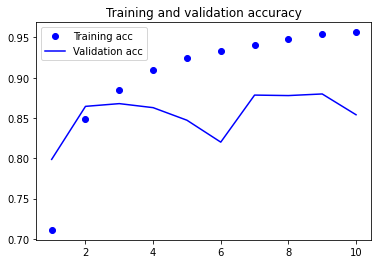

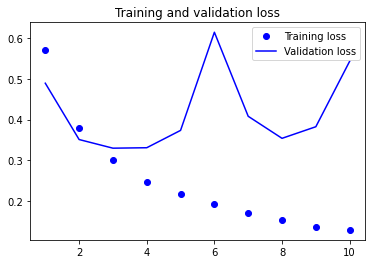

In [ ]:
#BIDIRECTIONAL RNN
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
max_len = 500
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

Loading data...


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 1,315,937
Trainable params: 1,315,937
Non-trainable params: 0
____________________________________________

In [ ]:
model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 66s 417ms/step - loss: 0.6928 - acc: 0.5060 - val_loss: 0.6909 - val_acc: 0.5818
Epoch 2/10
157/157 [==============================] - 65s 415ms/step - loss: 0.6863 - acc: 0.7221 - val_loss: 0.6837 - val_acc: 0.6624
Epoch 3/10
157/157 [==============================] - 65s 417ms/step - loss: 0.6732 - acc: 0.7578 - val_loss: 0.6521 - val_acc: 0.7580
Epoch 4/10
157/157 [==============================] - 65s 415ms/step - loss: 0.6283 - acc: 0.7902 - val_loss: 0.5649 - val_acc: 0.7852
Epoch 5/10
157/157 [==============================] - 65s 416ms/step - loss: 0.5194 - acc: 0.8322 - val_loss: 0.4426 - val_acc: 0.8284
Epoch 6/10
157/157 [==============================] - 65s 416ms/step - loss: 0.3954 - acc: 0.8548 - val_loss: 0.3690 - val_acc: 0.8454
Epoch 7/10
157/157 [==============================] - 65s 415ms/step - loss: 0.3208 - acc: 0.8803 - val_loss: 0.3371 - val_acc: 0.8582
Epoch 8/10
157/157 [==============================] - 6

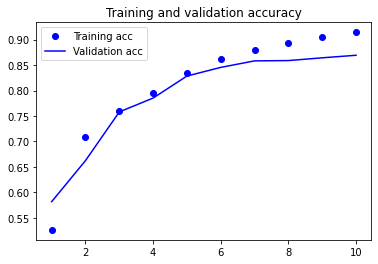

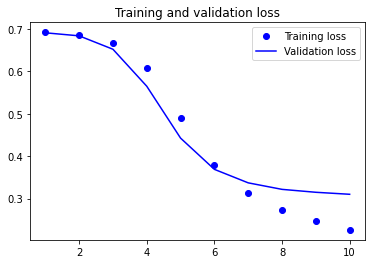

In [ ]:
#1D Convolutional Network
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
#LSTM model parameter summary
#MODEL - 2: RUNNING LSTM

from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Bidirectional LSTM model parameter summary
#MODEL 4: BI-DIRECTIONAL NETWORK:  -- TOO LONG TO RE -RUN LATER
#also just create and check how the LSTM network and Bidirectional lstm differ in the number of parameters
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________
